# TP 3 - Big Data 

## Parte I

### Ejercicio 1

### Ejercicio 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
import statsmodels.api as sm

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [2]:
EPH_hogar = pd.read_excel('usu_hogar_T123.xlsx')
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPSRHJMKNCDEHLEH00797939,2023,1,1,1,40,N,25,111,2,...,NaN,3.0,3,124,1,2,98,0,0,0
1,TQRMNORQYHLMKPCDEHLEH00717341,2023,1,1,1,40,N,25,150,1,...,NaN,5.0,7,193,2,0,98,0,0,0
2,TQRMNOPUWHLLKSCDEHLEH00798181,2023,1,1,1,40,N,25,156,2,...,NaN,5.0,6,185,1,0,98,0,0,0
3,TQRMNOSSWHKOKRCDEGOIH00778157,2023,1,1,1,40,N,18,229,1,...,NaN,2.0,2,228,2,0,1,0,0,0
4,TQRMNORPUHJMKSCDEGOIH00794685,2023,1,1,1,40,N,18,182,1,...,NaN,5.0,6,194,1,0,97,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16810,TQRMNOPUTHJOKQCDEHPJB00795338,2023,1,1,1,40,S,29,388,2,...,6.0,NaN,7,402,1,2,98,0,0,0
16811,TQRMNORRSHJOKQCDEHPJB00795339,2023,1,1,1,40,S,29,297,1,...,7.0,NaN,8,288,97,0,97,0,0,0
16812,TQRMNOPPTHJMLOCDEHPJB00795138,2023,1,1,1,40,S,29,288,2,...,4.0,NaN,5,359,1,0,2,0,0,0
16813,TQRMNOTTWHKOLLCDEHPJB00779470,2023,1,1,1,40,S,29,578,1,...,1.0,NaN,1,643,2,0,98,0,0,0


In [3]:
EPH_hogar = EPH_hogar.drop(EPH_hogar[(EPH_hogar["AGLOMERADO"] != 32) & (EPH_hogar["AGLOMERADO"] != 33)].index)
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
9,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,12.0,NaN,12,0,1,0,98,0,0,0
10,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,6.0,NaN,7,4733,1,0,2,0,0,0
11,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,33,2161,1,...,7.0,NaN,8,2672,1,0,98,0,0,0
35,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,33,3097,1,...,8.0,NaN,9,4844,1,0,98,0,0,0
98,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,33,2571,1,...,8.0,NaN,9,3482,1,0,97,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,TQRMNOQQTHLMNUCDEIJAH00780166,2023,1,1,1,1,S,33,808,1,...,4.0,NaN,4,864,1,0,98,0,0,0
16796,TQRMNOVWVHMMNQCDEIJAH00802643,2023,1,1,1,1,S,33,1686,1,...,7.0,NaN,8,3638,1,0,98,0,0,0
16797,TQRMNORRXHJOOMCDEIJAH00794543,2023,1,1,1,1,S,33,2461,1,...,12.0,NaN,12,0,2,0,1,3,45,0
16798,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,33,3381,1,...,1.0,NaN,1,4548,1,0,2,0,0,0


### Ejercicio 3.

In [4]:
EPH_individual = pd.read_excel('usu_individual_T123.xlsx')
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.00,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.00,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48633,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,S,10,528,...,NaN,7,66666.67,5,5.0,6,5.0,NaN,6,793
48634,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48635,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48636,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714


In [5]:
EPH_individual = EPH_individual.drop(EPH_hogar[(EPH_individual["AGLOMERADO"] != 32) & (EPH_individual["AGLOMERADO"] != 33)].index)
EPH_individual

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1133431408.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EPH_individual = EPH_individual.drop(EPH_hogar[(EPH_individual["AGLOMERADO"] != 32) & (EPH_individual["AGLOMERADO"] != 33)].index)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.00,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.00,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.00,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.00,12,12.0,12,NaN,12.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48633,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,S,10,528,...,NaN,7,66666.67,5,5.0,6,5.0,NaN,6,793
48634,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48635,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714
48636,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,S,10,447,...,NaN,5,25416.67,2,2.0,2,2.0,NaN,2,714


In [6]:
EPH = EPH_individual.merge(EPH_hogar, how = 'left')
EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46266,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,S,10,528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46267,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,S,10,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46268,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,S,10,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46269,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,S,10,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicio 4.

In [7]:
def drop_object_columns(df):
    # Get the list of column names with data type 'object'
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Drop the 'object' columns from the DataFrame
    df = df.drop(columns=object_columns)
    
    return df

def drop_columns_with_nulls(df, threshold=0.5):
    # Calculate the threshold for null values
    null_threshold = len(df) * threshold

    # Check for columns with null values exceeding the threshold
    high_null_columns = df.columns[df.isnull().sum() > null_threshold]

    # Drop the columns with high null values
    df = df.drop(columns=high_null_columns)

    return df

### Ejercicio 5.

In [8]:
#Eliminamos columnas con todos nulos
EPH = drop_columns_with_nulls(EPH, threshold=0.5)

#Eliminamos filas con valores sin sentido

#Eliminamos valores de EDADES (CH06) menores que 0
EPH = EPH.drop(EPH[EPH["CH06"] < 0].index)

#Eliminamos valores de TIPO DE UNION (CH07) igual a 9 
EPH = EPH.drop(EPH[EPH["CH07"] == 9].index)

#Eliminamos valores de INGRESOS (P47T) menores que 0
EPH = EPH.drop(EPH[EPH["P47T"] < 0].index)

#Eliminamos valores de INGRESOS TOTALES FAMILIARES(ITF) menores que 0
EPH = EPH.drop(EPH[EPH["ITF"] < 0].index)

#Reemplazamos valores de MAS_500 por 0 y 1
EPH['MAS_500'] = EPH['MAS_500'].replace('N', 0)
EPH['MAS_500'] = EPH['MAS_500'].replace('S', 1)

#Aplicamos funcion drop object

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,RDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,0,91,112,...,9,10.0,9,79700.00,6,6.0,5,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,0,91,190,...,4,6.0,5,180000.00,9,10.0,9,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,0,91,134,...,7,8.0,8,145000.00,9,9.0,8,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,0,91,134,...,7,8.0,8,145000.00,9,9.0,8,9.0,8,140
5,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,2,1,44,0,91,120,...,12,12.0,12,0.00,12,12.0,12,12.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46266,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,1,10,528,...,7,NaN,7,66666.67,5,5.0,6,NaN,6,793
46267,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,1,10,447,...,5,NaN,5,25416.67,2,2.0,2,NaN,2,714
46268,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,1,10,447,...,5,NaN,5,25416.67,2,2.0,2,NaN,2,714
46269,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,1,10,447,...,5,NaN,5,25416.67,2,2.0,2,NaN,2,714


### Ejercicio 6.

In [9]:
EPH.describe()

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,RDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,PDECCFR,ADECCFR,PONDIH
count,40882.0,40882.0,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,...,40882.000000,21816.000000,40882.000000,4.088200e+04,40882.000000,34900.000000,40882.000000,21816.000000,40882.000000,40882.000000
mean,2023.0,1.0,1.047551,2.529108,0.863338,35.965462,0.466367,23.725136,584.916614,2.490436,...,6.696786,6.526815,6.730126,6.061915e+04,5.594198,5.427794,5.753388,5.505180,5.787461,692.563182
std,0.0,0.0,0.809600,1.606899,0.347177,14.537784,0.498874,17.951774,792.135175,1.592072,...,3.409559,3.250574,3.406674,7.039991e+04,3.649211,3.540845,3.639667,3.459092,3.649561,1322.124779
min,2023.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,24.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,1.0,1.000000,1.000000,1.000000,40.000000,0.000000,12.000000,171.000000,1.000000,...,4.000000,4.000000,4.000000,2.260000e+04,2.000000,2.000000,3.000000,3.000000,3.000000,141.250000
50%,2023.0,1.0,1.000000,2.000000,1.000000,42.000000,0.000000,22.000000,297.000000,2.000000,...,7.000000,7.000000,7.000000,4.511800e+04,5.000000,5.000000,5.000000,5.000000,5.000000,272.000000
75%,2023.0,1.0,1.000000,3.000000,1.000000,43.000000,1.000000,32.000000,595.750000,3.000000,...,9.000000,9.000000,9.000000,8.000000e+04,8.000000,8.000000,9.000000,8.000000,9.000000,605.000000
max,2023.0,1.0,52.000000,16.000000,2.000000,44.000000,1.000000,93.000000,8423.000000,10.000000,...,12.000000,12.000000,12.000000,3.000000e+06,12.000000,12.000000,12.000000,12.000000,12.000000,20663.000000


### Ejercicio 7.

In [10]:
#Creamos una nueva columna donde agregamos un string de texto que contenga las comibinación de sexo y edad
EPH["sexo_edad"] = EPH["CH04"].astype(str) + "_" + EPH["CH06"].astype(str)

#Creamos las variables sexo y edad que pueden tomar cada uno de los valores posibles y 
#luego generamos todas las combinaciones posibles de sexo-edad
sexo = pd.Series([1, 2])
edad = pd.Series(range(104))
sexo_edad=[]
for i in sexo:
    for j in edad:
        sexo_edad.append(f"{i}_{j}")
sexo_edad

#Creamos un dataframe llamado Valores que tendrá las combinaciones posibles de sexo-edad
Valores=pd.DataFrame({'sexo_edad':sexo_edad})

#Creamos un vector con los valores de equivalencias respetando el orden del diccionario anterior
adulto_equiv= [0.35,	 0.37,	 0.46,	 0.51,	 0.55,	 0.6,	 0.64,	 0.66,	 0.68,	 
              0.69,	 0.79,	 0.82,	 0.85,	 0.9,	 0.96,	 1.0,	 1.03,	 1.04,	 
              1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 
              1.02,	 1.02,	 1.02,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.35,	 0.37,	 0.46,	 0.51,	 
              0.55,	 0.60,	 0.64,	 0.66,	 0.68,	 0.69,	 0.70,	 0.72,	 0.74,	 
              0.76,	 0.76,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63]

#Agregamos a nuestro dataframe dichas equivalencias
Valores["adulto_equiv"]=adulto_equiv

EPH = EPH.merge(Valores, how="left")

#A continuación sumamos el valor de equivalencia sexo-edad para cada uno de los hogares y lo almacenamos en una nueva variable que llamamos ad_equiv_hogar
ad_equiv_hogar = EPH.groupby(by="CODUSU").agg({"adulto_equiv":"sum"}).reset_index()
ad_equiv_hogar = ad_equiv_hogar.rename(columns={"adulto_equiv": "ad_equiv_hogar"})


#Nuevamente, agregamos esta nueva variable al dataframe anterior combinando por numero de hogar
EPH = EPH.merge(ad_equiv_hogar, how="left")

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IPCF,DECCFR,IDECCFR,RDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,0,91,112,...,79700.00,6,6.0,5,7.0,5,133,1_7,0.66,4.24
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,0,91,190,...,180000.00,9,10.0,9,10.0,9,200,2_83,0.63,0.63
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,0,91,134,...,145000.00,9,9.0,8,9.0,8,140,2_30,0.77,1.87
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,0,91,134,...,145000.00,9,9.0,8,9.0,8,140,1_32,1.10,1.87
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,2,1,44,0,91,120,...,0.00,12,12.0,12,12.0,12,0,2_37,0.77,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40877,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,1,10,528,...,66666.67,5,5.0,6,NaN,6,793,1_23,1.02,2.52
40878,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,1,10,447,...,25416.67,2,2.0,2,NaN,2,714,2_48,0.76,11.39
40879,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,1,10,447,...,25416.67,2,2.0,2,NaN,2,714,2_26,0.76,11.39
40880,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,1,10,447,...,25416.67,2,2.0,2,NaN,2,714,1_21,1.02,11.39


### Ejercicio 8.

In [11]:
respondieron= EPH[EPH["ITF"]!=0]
respondieron['ITF'].min()

1000

In [12]:
norespondieron= EPH[EPH["ITF"]==0]
norespondieron['ITF'].sum()

0

In [13]:
respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]
respondieron

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\3157423302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,0,91,112,...,6,6.0,5,7.0,5,133,1_7,0.66,4.24,243253.2520
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,0,91,190,...,9,10.0,9,10.0,9,200,2_83,0.63,0.63,36143.7615
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,0,91,134,...,9,9.0,8,9.0,8,140,2_30,0.77,1.87,107283.8635
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,0,91,134,...,9,9.0,8,9.0,8,140,1_32,1.10,1.87,107283.8635
8,TQRMNOPYXHLMKNCDEIOAH00720098,2023,1,1,3,0,43,0,38,83,...,6,7.0,6,7.0,7,86,2_8,0.68,0.68,39012.3140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40877,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,1,10,528,...,5,5.0,6,NaN,6,793,1_23,1.02,2.52,144575.0460
40878,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,1,10,447,...,2,2.0,2,NaN,2,714,2_48,0.76,11.39,653456.2595
40879,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,1,10,447,...,2,2.0,2,NaN,2,714,2_26,0.76,11.39,653456.2595
40880,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,1,10,447,...,2,2.0,2,NaN,2,714,1_21,1.02,11.39,653456.2595


### Ejercicio 9.

In [14]:
#Creamos una función que clasifique a pobres en función a la  relación entre ingreso total reportado y el necesario
def clasificar_pobreza(row):
    if row["ITF"] < row["ingreso_necesario"]:
        pobre = 1
    else:
        pobre = 0
    return pobre

In [15]:
#Aplicamos la función a nuestro dataframe y visualizamos los resultados
respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)
respondieron

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1156415633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,PDECCFR,ADECCFR,PONDIH,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,0,91,112,...,6.0,5,7.0,5,133,1_7,0.66,4.24,243253.2520,0
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,0,91,190,...,10.0,9,10.0,9,200,2_83,0.63,0.63,36143.7615,0
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,0,91,134,...,9.0,8,9.0,8,140,2_30,0.77,1.87,107283.8635,0
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,0,91,134,...,9.0,8,9.0,8,140,1_32,1.10,1.87,107283.8635,0
8,TQRMNOPYXHLMKNCDEIOAH00720098,2023,1,1,3,0,43,0,38,83,...,7.0,6,7.0,7,86,2_8,0.68,0.68,39012.3140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40877,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,1,10,528,...,5.0,6,NaN,6,793,1_23,1.02,2.52,144575.0460,0
40878,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,1,10,447,...,2.0,2,NaN,2,714,2_48,0.76,11.39,653456.2595,1
40879,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,1,10,447,...,2.0,2,NaN,2,714,2_26,0.76,11.39,653456.2595,1
40880,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,1,10,447,...,2.0,2,NaN,2,714,1_21,1.02,11.39,653456.2595,1


### Ejercicio 10.

In [16]:
ITF_hogar = respondieron.groupby(by=['CODUSU', 'NRO_HOGAR']).agg({'ITF': 'mean', 'ingreso_necesario': 'mean' ,'PONDIH': 'sum'}).reset_index()
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH
0,TQRMNOPPQHJMLOCDEHPJB00795718,1,258300.0,223173.3845,2950
1,TQRMNOPPQHJNLPCDEHJGH00793308,1,165000.0,261038.2775,1572
2,TQRMNOPPQHJNLTCDEFKID00798140,1,140000.0,121626.6260,2500
3,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,18320
4,TQRMNOPPQHKMLSCDEGGFB00777232,1,240000.0,102120.4690,1304
...,...,...,...,...,...
12512,TQUMNOVXQHMOMOCDEFKID00798588,1,30000.0,95809.6535,2654
12513,TQVMNOQPWHJLKRCDEFKID00793222,1,54000.0,43601.9980,1032
12514,TQVMNOQXPHJOKOCDEGLDF00800077,1,244800.0,107283.8635,164
12515,TQVMNOSPVHKMKRCDEGLDF00799993,1,80000.0,130805.9940,516


In [17]:
ITF_hogar['pobre'] = ITF_hogar.apply(clasificar_pobreza, axis=1)
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH,pobre
0,TQRMNOPPQHJMLOCDEHPJB00795718,1,258300.0,223173.3845,2950,0
1,TQRMNOPPQHJNLPCDEHJGH00793308,1,165000.0,261038.2775,1572,1
2,TQRMNOPPQHJNLTCDEFKID00798140,1,140000.0,121626.6260,2500,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,18320,0
4,TQRMNOPPQHKMLSCDEGGFB00777232,1,240000.0,102120.4690,1304,0
...,...,...,...,...,...,...
12512,TQUMNOVXQHMOMOCDEFKID00798588,1,30000.0,95809.6535,2654,1
12513,TQVMNOQPWHJLKRCDEFKID00793222,1,54000.0,43601.9980,1032,0
12514,TQVMNOQXPHJOKOCDEGLDF00800077,1,244800.0,107283.8635,164,0
12515,TQVMNOSPVHKMKRCDEGLDF00799993,1,80000.0,130805.9940,516,1


In [18]:
def tasa_pobreza_hogar(pobre, ponderacion):
    tasa_pobreza = sum(pobre * ponderacion)/sum(ponderacion)
    return(tasa_pobreza)

In [19]:
tasa_pobreza_hogar(ITF_hogar['pobre'], ITF_hogar['PONDIH'])

0.4121097972855973

## Parte II

### Ejercicio 1.

In [20]:
def evalua_metodo(model, X_train, X_test, y_train, y_test, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    '''
    Esta función evalua un modelo de estimación y devuelve diferentes métricas. 
    Input:
            model: es el nombre del modelo a implementar. Puede tomar los siguientes valores
                'log': modelo logístico
                'lda#': modelo de análisis discriminante lineal con # componentes
                'knn#': modelo de vecinos cercanos con # vecinos
            X_train: particion de la muestra de entrenamiento para predictores 
            y_train: particion de la muestra de entrenamiento para valores a predecir
            X_test: particion de la muestra de testeo para predictores
            y_test: particion de la muestra de testeo para valores a predecir
    Output:
            Verdadero 0: cantidad de verdaderos negativos
            Falso 1: cantidad de falsos positivos
            Falso 0: cantidad de falsos negativos
            Verdadero 1: cantidad de verdaderos positivos
            ROC_Plot: Gráfico de la curva ROC
            AUC: Área debajo de la curva ROC
            Accuracy: nivel de accuracy
    '''
    model1 = model[:3]
    if model1 == 'log':
        m = LogisticRegression(max_iter = hyperparameters['max_iter'], penalty=hyperparameters['penalty'], C=hyperparameters['C'], solver = hyperparameters['solver']).fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'lda':
        components = int(''.join([char for char in model if char.isnumeric()]))
        m = LinearDiscriminantAnalysis(n_components=components)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'knn':
        neighbors = int(''.join([char for char in model if char.isnumeric()]))
        m = KNeighborsClassifier(n_neighbors=neighbors)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    else:
        print('Modelo no especificado correctamente')
    
    results = {}
    
    #Matriz de confusion
    matriz_confusion = confusion_matrix(y_test, y_test_pred)
    tn, fp , fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    results["Verdadero 0"] = tn
    results["Falso 1"] = fp
    results["Falso 0"] = fn
    results["Verdadero 1"] = tp
    
    #Curva ROC
    auc = roc_auc_score(y_test, y_test_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=model)
    display.plot()  
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plot_filename = "roc_curve.png"
    results['ROC_Plot'] = plot_filename
    plt.close()
    
    #AUC
    results['AUC'] = auc
    
    #Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    results['Accuracy'] = accuracy
    
    #ECM
    ecm = mean_squared_error(y_test, y_test_pred)
    results['ECM'] = ecm
    
    #Coefficients
    if model1 == 'knn':
        coef = []
    else:
        coef = m.coef_
        results['Coefficients'] = coef
    return(results)

### Ejercicio 2.

In [21]:
def cross_validation(model, K, X, y, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    ecms = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
    kf = KFold(n_splits=K, shuffle=True, random_state=100)
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
        results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
        ecm = results['ECM']
        ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
    ecms = ecms.astype({"particion":int})
    return(ecms)
    

### Ejercicio 3.

In [22]:
def evalua_config(model, K, X, y, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    min_ecm = np.Inf
    if model == 'log':
        for i in hyperparam:
            hyperparameters = i
            a = cross_validation(model, K, X, y, hyperparameters)
            ecms = a
            prom = ecms['ecm'].mean()
            if prom < min_ecm:
                min_ecms = prom
                hyper = hyperparameters
            else:
                min_ecms = min_ecms
                hyper = hyper
            return(hyper, min_ecms)
    else:
        return('Modelo no compatible con esta función')

### Ejercicio 4.

In [23]:
def evalua_metodos_multiples(models, X, y, K, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    resultados = pd.DataFrame(columns=["modelo", "hiperparámetros", "Verdadero 0", "Falso 1", "Falso 0", "Verdadero 1", "ROC_Plot", "AUC", "Accuracy", "ECM"])
    for model in models:
        if model == 'log':
            h = evalua_config(model, K, X, y, hyperparam)
            hyperparameters = h[0]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparam)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
    return(resultados)

## Parte III

### Ejercicio 1

In [24]:
#Eliminamos variables de "Ingresos de la ocupacion principal de los asalariados"
respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de la ocupacion principal"
respondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de otras ocupaciones"
respondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total individual"
respondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos no laborales"
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total familiar"
respondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso per cápita familiar"
respondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')

#Eliminamos las columnas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True, errors='ignore')

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [25]:
respondieron = respondieron.reset_index(drop = True)
norespondieron = norespondieron.reset_index(drop = True)

In [26]:
respondieron

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,sexo_edad,pobre
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,0,91,112,...,0,0,0,0,0,0,0,0,1_7,0
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,0,91,190,...,0,0,0,0,0,0,2,2,2_83,0
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,0,91,134,...,0,0,0,0,0,0,0,0,2_30,0
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,0,91,134,...,0,0,0,0,0,0,0,0,1_32,0
4,TQRMNOPYXHLMKNCDEIOAH00720098,2023,1,1,3,0,43,0,38,83,...,0,0,0,0,0,0,0,0,2_8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34797,TQSMNORQYHMMLLCDEGGFB00799328,2023,1,1,3,1,42,1,10,528,...,0,0,0,0,0,0,0,0,1_23,0
34798,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,1,1,42,1,10,447,...,0,0,0,0,0,0,0,0,2_48,1
34799,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,2,1,42,1,10,447,...,0,0,0,0,0,0,0,0,2_26,1
34800,TQRMNORSVHMMLLCDEGGFB00799329,2023,1,3,3,1,42,1,10,447,...,0,0,0,0,0,0,0,0,1_21,1


In [27]:
respondieron1 = respondieron.dropna()
respondieron1 = drop_object_columns(respondieron1)
y = respondieron1['pobre']
X = respondieron1.drop(columns = ['pobre'])
X = sm.add_constant(X)


### Ejercicio 2.

In [28]:
models = ['log', 'lda1', 'knn3']
hyperparam = [{'max_iter':10000, 'penalty': 'l1', 'C': 1, 'solver': 'saga'},
             {'max_iter':10000, 'penalty': 'l2', 'C': 1, 'solver': 'saga'}]
K = 5
evalua_metodos_multiples(models, X, y, K, hyperparam)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

,modelo,hiperparámetros,Verdadero 0,Falso 1,Falso 0,Verdadero 1,ROC_Plot,AUC,Accuracy,ECM
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",1801,831,706,2041,roc_curve.png,0.772898,0.714259,0.285741
1,lda1,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",1797,835,711,2036,roc_curve.png,0.771322,0.712586,0.287414
2,knn3,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",1737,895,880,1867,roc_curve.png,0.712964,0.670013,0.329987


### Ejercicio 3.

### Ejercicio 4.

### Ejercicio 5.

In [29]:
N = list(range(-5, 6))
reg = 'l1'
K = 10
model = 'log'
hyperparam_lasso = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_lasso.append(hyperparameters)

In [30]:
N = list(range(-5, 6))
reg = 'l2'
K = 10
model = 'log'
hyperparam_ridge = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_ridge.append(hyperparameters)

In [31]:
best_lasso = evalua_config(model, K, X, y, hyperparam_lasso)
best_ridge = evalua_config(model, K, X, y, hyperparam_ridge)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

In [32]:
lamda_lasso = 1/best_lasso[0]['C']
lamda_ridge = 1/best_ridge[0]['C']
print('El lamda óptimo para lasso: ', lamda_lasso)
print('El lamda óptimo para ridge: ', lamda_ridge)

El lamda óptimo para lasso:  1e-05
El lamda óptimo para ridge:  1e-05


In [34]:
N = list(range(-5, 6))
reg = ['l1', 'l2']
K = 10
model = 'log'
punto_5 = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
for r in reg:
    for n in N:
        hyperparam = {'max_iter':10000, 'penalty': r, 'C': 1/(10**n), 'solver': 'saga'}
        resultados = cross_validation(model, K, X, y, hyperparam)
        punto_5 = punto_5.append(resultados)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\544701107.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5.append(resultados)
C:\Users\manue\AppData\Local\Te

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\544701107.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5.append(resultados)
C:\Users\manue\AppData\Local\Te

In [35]:
punto_5 = punto_5.reset_index(drop = True)
punto_5

,modelo,hyperparameters,particion,ecm,Coefficients
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",0,0.284997,"[[0.0, 0.0, 0.02188833056328641, 0.20371675318..."
1,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",1,0.277747,"[[0.0, 0.0, 0.02597825684243402, 0.21553452000..."
2,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",2,0.293921,"[[0.0, 0.0, 0.01933807657475287, 0.19359989549..."
3,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",3,0.306748,"[[0.0, 0.0, 0.018621374803316947, 0.2019461935..."
4,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",4,0.295036,"[[0.0, 0.0, 0.02032495843521351, 0.19797997112..."
...,...,...,...,...,...
215,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",5,0.374233,"[[0.0, 0.0, 0.00011760932232222233, 0.01418953..."
216,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",6,0.383157,"[[0.0, 0.0, 0.0003566535782068435, 0.014627335..."
217,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",7,0.391183,"[[0.0, 0.0, 0.00032027140286247847, 0.01463988..."
218,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",8,0.378348,"[[0.0, 0.0, 0.0011882200237749746, 0.014304357..."


In [36]:
punto_5_2 = pd.concat([punto_5.drop(['hyperparameters'], axis=1), punto_5['hyperparameters'].apply(pd.Series)], axis=1)
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver
0,log,0,0.284997,"[[0.0, 0.0, 0.02188833056328641, 0.20371675318...",10000,l1,100000.00000,saga
1,log,1,0.277747,"[[0.0, 0.0, 0.02597825684243402, 0.21553452000...",10000,l1,100000.00000,saga
2,log,2,0.293921,"[[0.0, 0.0, 0.01933807657475287, 0.19359989549...",10000,l1,100000.00000,saga
3,log,3,0.306748,"[[0.0, 0.0, 0.018621374803316947, 0.2019461935...",10000,l1,100000.00000,saga
4,log,4,0.295036,"[[0.0, 0.0, 0.02032495843521351, 0.19797997112...",10000,l1,100000.00000,saga
...,...,...,...,...,...,...,...,...
215,log,5,0.374233,"[[0.0, 0.0, 0.00011760932232222233, 0.01418953...",10000,l2,0.00001,saga
216,log,6,0.383157,"[[0.0, 0.0, 0.0003566535782068435, 0.014627335...",10000,l2,0.00001,saga
217,log,7,0.391183,"[[0.0, 0.0, 0.00032027140286247847, 0.01463988...",10000,l2,0.00001,saga
218,log,8,0.378348,"[[0.0, 0.0, 0.0011882200237749746, 0.014304357...",10000,l2,0.00001,saga


In [37]:
punto_5_2['lamda'] = 1/punto_5_2['C']
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.284997,"[[0.0, 0.0, 0.02188833056328641, 0.20371675318...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.277747,"[[0.0, 0.0, 0.02597825684243402, 0.21553452000...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.293921,"[[0.0, 0.0, 0.01933807657475287, 0.19359989549...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.306748,"[[0.0, 0.0, 0.018621374803316947, 0.2019461935...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.295036,"[[0.0, 0.0, 0.02032495843521351, 0.19797997112...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
215,log,5,0.374233,"[[0.0, 0.0, 0.00011760932232222233, 0.01418953...",10000,l2,0.00001,saga,100000.00000
216,log,6,0.383157,"[[0.0, 0.0, 0.0003566535782068435, 0.014627335...",10000,l2,0.00001,saga,100000.00000
217,log,7,0.391183,"[[0.0, 0.0, 0.00032027140286247847, 0.01463988...",10000,l2,0.00001,saga,100000.00000
218,log,8,0.378348,"[[0.0, 0.0, 0.0011882200237749746, 0.014304357...",10000,l2,0.00001,saga,100000.00000


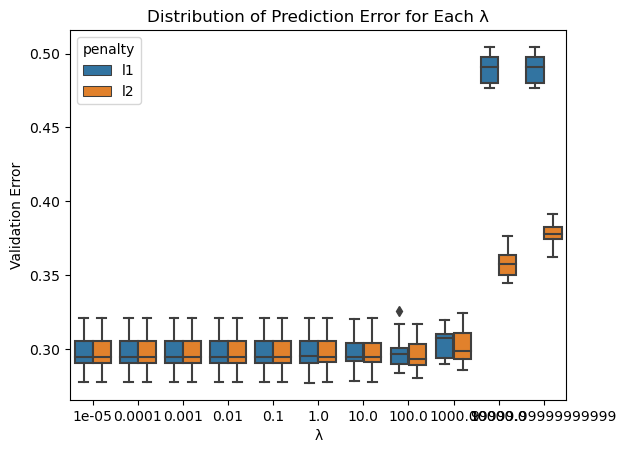

In [38]:
plt.figure()
sns.boxplot(x='lamda', y='ecm', data=punto_5_2, hue='penalty')
plt.title('Distribution of Prediction Error for Each λ')
plt.xlabel('λ')
plt.ylabel('Validation Error')
plt.show()

In [41]:
punto_5_3 = punto_5_2.drop(punto_5_2[punto_5_2['penalty'] == 'l2'].index)
punto_5_3

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.284997,"[[0.0, 0.0, 0.02188833056328641, 0.20371675318...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.277747,"[[0.0, 0.0, 0.02597825684243402, 0.21553452000...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.293921,"[[0.0, 0.0, 0.01933807657475287, 0.19359989549...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.306748,"[[0.0, 0.0, 0.018621374803316947, 0.2019461935...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.295036,"[[0.0, 0.0, 0.02032495843521351, 0.19797997112...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
105,log,5,0.476854,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
106,log,6,0.477970,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
107,log,7,0.504464,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
108,log,8,0.492746,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000


In [74]:
def coef(coef):
    c = coef[0]
    return(c)

def proportion_of_zeros(arr):
    if arr == []:
        return 0.0
    
    zero_count = (arr == 0).sum()
    proportion = zero_count / len(arr)
    
    return proportion


In [76]:
punto_5_3['Coefficients'] = punto_5_3['Coefficients'].apply(coef)
punto_5_3

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda,% Coef = 0
0,log,0,0.284997,"[0.0, 0.0, 0.02188833056328641, 0.203716753184...",10000,l1,100000.00000,saga,0.00001,2.0
1,log,1,0.277747,"[0.0, 0.0, 0.02597825684243402, 0.215534520009...",10000,l1,100000.00000,saga,0.00001,2.0
2,log,2,0.293921,"[0.0, 0.0, 0.01933807657475287, 0.193599895490...",10000,l1,100000.00000,saga,0.00001,2.0
3,log,3,0.306748,"[0.0, 0.0, 0.018621374803316947, 0.20194619359...",10000,l1,100000.00000,saga,0.00001,2.0
4,log,4,0.295036,"[0.0, 0.0, 0.02032495843521351, 0.197979971121...",10000,l1,100000.00000,saga,0.00001,2.0
...,...,...,...,...,...,...,...,...,...,...
105,log,5,0.476854,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000,37.0
106,log,6,0.477970,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000,37.0
107,log,7,0.504464,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000,37.0
108,log,8,0.492746,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000,37.0


In [77]:
punto_5_3['% Coef = 0'] = punto_5_3['Coefficients'].apply(proportion_of_zeros)
punto_5_3['% Coef = 0']

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1392224897.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if arr == []:


0      0.054054
1      0.054054
2      0.054054
3      0.054054
4      0.054054
         ...   
105    1.000000
106    1.000000
107    1.000000
108    1.000000
109    1.000000
Name: % Coef = 0, Length: 110, dtype: float64

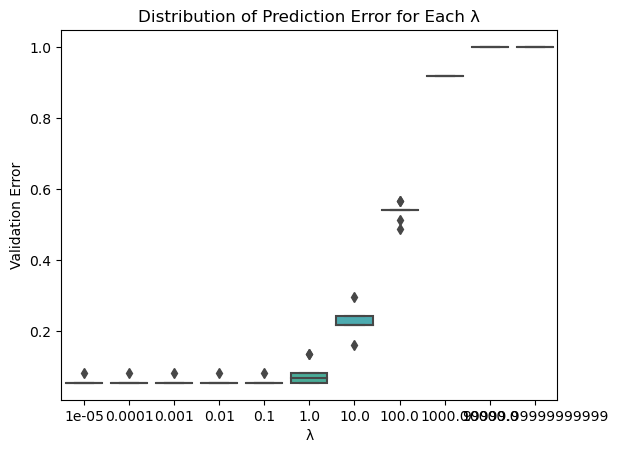

In [80]:
plt.figure()
sns.boxplot(x='lamda', y='% Coef = 0', data=punto_5_3)
plt.title('Distribution of Prediction Error for Each λ')
plt.xlabel('λ')
plt.ylabel('Validation Error')
plt.show()